# **Project Title: Make Job Hunting Easier: LinkedIn Job Recommendation Based on Applicants' Description**

team member: Shaoying Zheng, Zhongrui Ning, Xiao Pu


# **Overview**

Our project hopes to match the most suitable job in the LinkedIn system with the information provided by the applicant, including their education, skills, ideal industry, ideal salary, etc. Ideally, the model we build will be adaptive, it can adjust and provide suitable job matches even with incomplete details.

# **Motivation**

Job hunting process for college students is daunting, especially in today's rapidly evolving labor market, where new-graduate job seekers are faced with an overwhelming number of job postings. When going through job application websites or apps like LinkedIn, many applicants spend a considerable amount of time filtering through irrelevant or unsuitable jobs, leading to inefficiency and frustration. Therefore, developing a smart, data-driven recommendation system that can make job hunting more personalized, efficient, and tailored to each individual's profile would provide immense value to job seekers.

Here are several specific questions we aim to explore:
1. What are the most common skills listed in job postings across various industries?

    What we hope to learn: By identifying the most frequently mentioned skills, we hope to find some "universal" skills in this era.

2. How do job requirements vary across different industries?

    What we hope to learn: We hope to identify the unique skills and qualifications required in different industries, which can help job seekers better understand the job market and make informed decisions.

3. How could job hunters with different background find suitable jobs?
  
    What we hope to learn: We hope to build a model that can provide job recommendations based on the applicant's background information, such as education, skills, and industry preference. Also, we hope to explore how the model can adapt to incomplete information.





# **Data Sources**

Source: [LinkedIn Job Postings (2023 - 2024)](ttps://www.kaggle.com/datasets/arshkon/linkedin-job-postingslo)
- A Snapshot Into the Current Job Market including company, jobs and mapping datasets.
This data source contains a nearly comprehensive record of 124,000+ job postings listed in 2023 and 2024. Each individual posting contains dozens of valuable attributes for both postings and companies, including the title, job description, salary, location, application URL, and work-types (remote, contract, etc), in addition to separate files containing the benefits, skills, and industries associated with each posting.


We're using 9 tables from original data source for this project:

1. `companies.csv`: Describing the situation of the companies
2. `company_industries.csv`: Industries that companies focusing on
3. `employee_counts.csv`: Amount of employee and follower on LinkedIn of those companies
4. `industries.csv`: Industries identifier ID and descriptions
5. `skills.csv`: Full name and abbreviation of job skills
6. `job_skills.csv`: What skills the posting jobs need
7. `job_industries.csv`: What industries the posting jobs based on
8. `salaries.csv`: The salary condition for the posted jobs
9. `job_company_id.csv`: To connect the posted job and certain company. 


# **Data description**

Here is how the data is structured and the columns attributes we used for merging. 

![SI_618_proj_ERD.png](SI_618_proj_ERD.png)

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.ticker as mticker

In [150]:
# import the csv files and save as pd dataframes
companies = pd.read_csv('./Projectdata/company/companies.csv',usecols=['company_id','name','company_size','country'])
company_industries = pd.read_csv('./Projectdata/company/company_industries.csv', usecols=['company_id','industry'])
employee_counts = pd.read_csv('./Projectdata/company/employee_counts.csv', usecols=['company_id','employee_count', 'follower_count'])
skills = pd.read_csv('./Projectdata/mappings/skills.csv', usecols=['skill_abr','skill_name'] )
industries = pd.read_csv('./Projectdata/mappings/industries.csv', usecols=['industry_id','industry_name'])
job_skills = pd.read_csv('./Projectdata/jobs/job_skills.csv', usecols=['job_id','skill_abr'])
job_industries = pd.read_csv('./Projectdata/jobs/job_industries.csv', usecols=['job_id','industry_id'])
salaries = pd.read_csv('./Projectdata/jobs/salaries.csv', usecols=['job_id','max_salary','min_salary','med_salary','pay_period'])
job_company_pair = pd.read_csv('./job_company_id.csv', usecols=['job_id','company_id'])

In [151]:
#briefly check the data
print("Companies Data:")
print(companies.head(5))

print("\nCompany Industries Data:")
print(company_industries.head(5))

print("\nEmployee Counts Data:")
print(employee_counts.head(5))

print("\nSkills Data:")
print(skills.head(5))

print("\nIndustries Data:")
print(industries.head(5))

print("\nJob Skills Data:")
print(job_skills.head(5))

print("\nJob Industries Data:")
print(job_industries.head(5))

print("\nSalaries Data:")
print(salaries.head(5))

print("\nJob-Company Pair Data:")
print(job_company_pair.head(5))


Companies Data:
   company_id                        name  company_size country
0        1009                         IBM           7.0      US
1        1016               GE HealthCare           7.0      US
2        1025  Hewlett Packard Enterprise           7.0      US
3        1028                      Oracle           7.0      US
4        1033                   Accenture           7.0      IE

Company Industries Data:
   company_id                        industry
0      391906  Book and Periodical Publishing
1    22292832                    Construction
2       20300                         Banking
3     3570660  Book and Periodical Publishing
4      878353         Staffing and Recruiting

Employee Counts Data:
   company_id  employee_count  follower_count
0      391906             186           32508
1    22292832             311            4471
2       20300            1053            6554
3     3570660             383           35241
4      878353              52           26397

# **Data Manipulation**

## Steps:
**1. Merge dataframes:**

**2. Handle missing values:**

**3.Standardize Format:**

**4.create new columns**

In [152]:
# Because original posting data is too large, we will only use a subset of the data

# job_company_id = pd.read_csv('./Projectdata/postings.csv', usecols=['job_id','company_id'])
# job_company_id.to_csv('./Projectdata/job_company_id.csv', index=False)

In [153]:
# Make sure IDs are not null in all tables, and make sure keys (first column in each table) are unique
for table in [companies, company_industries, employee_counts, skills, industries, job_skills, job_industries, salaries]:
    id_fields = [col for col in table.columns if col.endswith('_id')]
    for field in id_fields:
        if field in table.columns:
            assert table[field].isnull().sum() == 0

In [154]:
# First, merge all dataframes related to jobs
job_skills = job_skills.merge(skills, on='skill_abr')

In [155]:
# Merge job_skills with job relating dataframes
job_condition = job_skills.merge(job_industries, on='job_id')
job_condition


,job_id,skill_abr,skill_name,industry_id
0,3884428798,MRKT,Marketing,82
1,3884428798,PR,Public Relations,82
2,3884428798,WRT,Writing/Editing,82
3,3887473071,SALE,Sales,48
4,3887465684,FIN,Finance,41
...,...,...,...,...
286880,3902876855,HR,Human Resources,80
286881,3902878689,MGMT,Management,116
286882,3902878689,MNFC,Manufacturing,116
286883,3902883233,SALE,Sales,44


In [156]:
job_condition = job_condition.merge(salaries, on='job_id')
job_condition

,job_id,skill_abr,skill_name,industry_id,max_salary,med_salary,min_salary,pay_period
0,3884428798,MRKT,Marketing,82,NaN,20.0,NaN,HOURLY
1,3884428798,PR,Public Relations,82,NaN,20.0,NaN,HOURLY
2,3884428798,WRT,Writing/Editing,82,NaN,20.0,NaN,HOURLY
3,3887470552,ADM,Administrative,54,25.00,NaN,23.0,HOURLY
4,3884431523,MGMT,Management,56,120000.00,NaN,100000.0,YEARLY
...,...,...,...,...,...,...,...,...
95083,3902883232,ADM,Administrative,104,NaN,25.0,NaN,HOURLY
95084,3902866633,PROD,Production,62,21.53,NaN,21.1,HOURLY
95085,3902879720,ACCT,Accounting/Auditing,27,125000.00,NaN,100000.0,YEARLY
95086,3902878689,MGMT,Management,116,85862.00,NaN,63601.0,YEARLY


In [157]:
job_condition = job_condition.merge(industries, on='industry_id')
job_condition

,job_id,skill_abr,skill_name,industry_id,max_salary,med_salary,min_salary,pay_period,industry_name
0,3884428798,MRKT,Marketing,82,NaN,20.0,NaN,HOURLY,Book and Periodical Publishing
1,3884428798,PR,Public Relations,82,NaN,20.0,NaN,HOURLY,Book and Periodical Publishing
2,3884428798,WRT,Writing/Editing,82,NaN,20.0,NaN,HOURLY,Book and Periodical Publishing
3,3887470552,ADM,Administrative,54,25.00,NaN,23.0,HOURLY,Chemical Manufacturing
4,3884431523,MGMT,Management,56,120000.00,NaN,100000.0,YEARLY,Mining
...,...,...,...,...,...,...,...,...,...
95083,3902883232,ADM,Administrative,104,NaN,25.0,NaN,HOURLY,Staffing and Recruiting
95084,3902866633,PROD,Production,62,21.53,NaN,21.1,HOURLY,Railroad Equipment Manufacturing
95085,3902879720,ACCT,Accounting/Auditing,27,125000.00,NaN,100000.0,YEARLY,Retail
95086,3902878689,MGMT,Management,116,85862.00,NaN,63601.0,YEARLY,"Transportation, Logistics, Supply Chain and St..."


In [158]:
# merge company dataframes
companies = companies.merge(company_industries, on='company_id')


In [159]:
companies_condition = companies.merge(employee_counts, on='company_id')

In [160]:
companies_condition = companies_condition.merge(industries, left_on='industry', right_on='industry_name')


In [161]:
companies_condition.drop(columns=['industry'], inplace=True)


In [162]:
companies_condition

,company_id,name,company_size,country,employee_count,follower_count,industry_id,industry_name
0,1009,IBM,7.0,US,314102,16253625,96,IT Services and IT Consulting
1,1009,IBM,7.0,US,313142,16309464,96,IT Services and IT Consulting
2,1009,IBM,7.0,US,313147,16309985,96,IT Services and IT Consulting
3,1009,IBM,7.0,US,311223,16314846,96,IT Services and IT Consulting
4,1016,GE HealthCare,7.0,US,56873,2185368,14,Hospitals and Health Care
...,...,...,...,...,...,...,...,...
35701,103463217,JRC Services,2.0,0,0,21,122,Facilities Services
35702,103466352,Centent Consulting LLC,NaN,0,0,0,11,Business Consulting and Services
35703,103467540,"Kings and Queens Productions, LLC",NaN,0,0,12,36,Broadcast Media Production and Distribution
35704,103468936,WebUnite,NaN,US,0,1,11,Business Consulting and Services


In [163]:
#join job and company dataframes using job_company_pair
job_company_pair = job_company_pair.merge(job_condition, on='job_id',how='inner')
companies_condition.drop(columns=['industry_id'], inplace=True)
companies_condition.drop(columns=['industry_name'], inplace=True)#drop duplicate columns
job_company_pair = job_company_pair.merge(companies_condition, on='company_id',how='inner')
job_company_pair

,job_id,company_id,skill_abr,skill_name,industry_id,max_salary,med_salary,min_salary,pay_period,industry_name,name,company_size,country,employee_count,follower_count
0,921716,2774458.0,MRKT,Marketing,44,20.0,NaN,17.0,HOURLY,Real Estate,Corcoran Sawyer Smith,2.0,US,402,2351
1,921716,2774458.0,SALE,Sales,44,20.0,NaN,17.0,HOURLY,Real Estate,Corcoran Sawyer Smith,2.0,US,402,2351
2,10998357,64896719.0,MGMT,Management,32,65000.0,NaN,45000.0,YEARLY,Restaurants,The National Exemplar,1.0,US,15,40
3,10998357,64896719.0,MNFC,Manufacturing,32,65000.0,NaN,45000.0,YEARLY,Restaurants,The National Exemplar,1.0,US,15,40
4,23221523,766262.0,OTHR,Other,9,175000.0,NaN,140000.0,YEARLY,Law Practice,"Abrams Fensterman, LLP",2.0,US,222,2427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307890,3906267117,56120.0,BD,Business Development,9,195000.0,NaN,120000.0,YEARLY,Law Practice,Lozano Smith,2.0,US,185,2818
307891,3906267224,43325.0,MRKT,Marketing,25,75000.0,NaN,70000.0,YEARLY,Manufacturing,Solugenix,5.0,US,862,79661
307892,3906267224,43325.0,MRKT,Marketing,25,75000.0,NaN,70000.0,YEARLY,Manufacturing,Solugenix,5.0,US,875,81300
307893,3906267224,43325.0,MRKT,Marketing,25,75000.0,NaN,70000.0,YEARLY,Manufacturing,Solugenix,5.0,US,874,81918


In [164]:
# check the data
job_company_pair.isnull().sum()

job_id                 0
company_id             0
skill_abr              0
skill_name             0
industry_id            0
max_salary         48150
med_salary        259745
min_salary         48150
pay_period             0
industry_name         41
name                   0
company_size        5532
country                0
employee_count         0
follower_count         0
dtype: int64

### Create new column

In [165]:
'''1. Create a new column to calculate the ratio of the employee count to the follower count to find out the potential job hunting 
competiton of the company'''
job_company_pair['employee_follower_ratio'] = job_company_pair['employee_count'] / job_company_pair['follower_count']   


In [166]:
# 2. Convert the salary to annual salary
import numpy as np
# Define a function to convert salaries to annual amounts
def convert_salary_to_annual(df, pay_period_col, salary_cols, output_cols):
    """
    Converts salary columns from different pay periods to annual salary with custom output column names.
    
    Parameters:
    df: DataFrame, the data table
    pay_period_col: str, the column name indicating the pay period (e.g., 'pay_period')
    salary_cols: list, the list of salary columns to convert (e.g., ['min_salary', 'max_salary'])
    output_cols: list, the custom output column names for the annual salaries (e.g., ['annual_min_salary', 'annual_max_salary'])
    * considering 2 weeks of unpaid leave
    Returns:
    DataFrame: A DataFrame with new columns for annual salaries
    """
    for i, salary_col in enumerate(salary_cols):
        output_col = output_cols[i]
        df[output_col] = np.where(
            df[pay_period_col] == 'HOURLY', 
            df[salary_col] * 40 * 52,  # 40 hours per week, 52 weeks per year
            np.where(
                df[pay_period_col] == 'WEEKLY', 
                df[salary_col] * 52,  # 52 weeks per year
                np.where(
                    df[pay_period_col] == 'BIWEEKLY', 
                    df[salary_col] * 26,  # 26 pay periods per year
                    np.where(
                        df[pay_period_col] == 'MONTHLY', 
                        df[salary_col] * 12,  # 12 months per year
                        df[salary_col]  # If already YEARLY, keep it as is
                    )
                )
            )
        )
    return df
df = job_company_pair
df = convert_salary_to_annual(df, 'pay_period', ['min_salary', 'max_salary','med_salary'], ['annual_min_salary', 'annual_max_salary','annual_med_salary'])
df

,job_id,company_id,skill_abr,skill_name,industry_id,max_salary,med_salary,min_salary,pay_period,industry_name,name,company_size,country,employee_count,follower_count,employee_follower_ratio,annual_min_salary,annual_max_salary,annual_med_salary
0,921716,2774458.0,MRKT,Marketing,44,20.0,NaN,17.0,HOURLY,Real Estate,Corcoran Sawyer Smith,2.0,US,402,2351,0.170991,35360.0,41600.0,NaN
1,921716,2774458.0,SALE,Sales,44,20.0,NaN,17.0,HOURLY,Real Estate,Corcoran Sawyer Smith,2.0,US,402,2351,0.170991,35360.0,41600.0,NaN
2,10998357,64896719.0,MGMT,Management,32,65000.0,NaN,45000.0,YEARLY,Restaurants,The National Exemplar,1.0,US,15,40,0.375000,45000.0,65000.0,NaN
3,10998357,64896719.0,MNFC,Manufacturing,32,65000.0,NaN,45000.0,YEARLY,Restaurants,The National Exemplar,1.0,US,15,40,0.375000,45000.0,65000.0,NaN
4,23221523,766262.0,OTHR,Other,9,175000.0,NaN,140000.0,YEARLY,Law Practice,"Abrams Fensterman, LLP",2.0,US,222,2427,0.091471,140000.0,175000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307890,3906267117,56120.0,BD,Business Development,9,195000.0,NaN,120000.0,YEARLY,Law Practice,Lozano Smith,2.0,US,185,2818,0.065649,120000.0,195000.0,NaN
307891,3906267224,43325.0,MRKT,Marketing,25,75000.0,NaN,70000.0,YEARLY,Manufacturing,Solugenix,5.0,US,862,79661,0.010821,70000.0,75000.0,NaN
307892,3906267224,43325.0,MRKT,Marketing,25,75000.0,NaN,70000.0,YEARLY,Manufacturing,Solugenix,5.0,US,875,81300,0.010763,70000.0,75000.0,NaN
307893,3906267224,43325.0,MRKT,Marketing,25,75000.0,NaN,70000.0,YEARLY,Manufacturing,Solugenix,5.0,US,874,81918,0.010669,70000.0,75000.0,NaN


In [167]:
# 3. Classify the skills
# Define a function to classify each skill based on keywords in the skill name
def classify_skill(skill_name):
    skill_name = skill_name.lower()
    if any(keyword in skill_name for keyword in ['art', 'design', 'creative', 'advertising', 'marketing']):
        return 'Creative'
    elif any(keyword in skill_name for keyword in ['product', 'project', 'management', 'admin']):
        return 'Administration'
    elif any(keyword in skill_name for keyword in ['distribution', 'logistics', 'operations']):
        return 'Logistics & Operations'
    elif any(keyword in skill_name for keyword in ['technical', 'engineering', 'development', 'programming']):
        return 'Technical & Engineering'
    elif any(keyword in skill_name for keyword in ['finance', 'accounting', 'economics']):
        return 'Finance'
    elif any(keyword in skill_name for keyword in ['sales', 'business', 'customer']):
        return 'Business'
    elif any(keyword in skill_name for keyword in ['hr', 'human resources', 'recruitment']):
        return 'Human Resources'
    elif any(keyword in skill_name for keyword in ['legal', 'law', 'compliance']):
        return 'Legal & Compliance'
    else:
        return 'Other'

# Apply the function to classify each skill
df['skill_category'] = df['skill_name'].apply(classify_skill)

### Handle the missing values

In [168]:
# df[(df['annual_min_salary']==0)]
df[(df['annual_med_salary']==0)]
df[(df['annual_med_salary']==0) & (df['annual_min_salary'].isnull() == False)]

,job_id,company_id,skill_abr,skill_name,industry_id,max_salary,med_salary,min_salary,pay_period,industry_name,name,company_size,country,employee_count,follower_count,employee_follower_ratio,annual_min_salary,annual_max_salary,annual_med_salary,skill_category


In [169]:
df['annual_med_salary'] = df.apply(
    lambda row: row['annual_max_salary'] if pd.isnull(row['annual_med_salary']) and row['annual_min_salary'] == row['annual_max_salary'] 
    else (row['annual_min_salary'] + row['annual_max_salary']) * 0.8 
    if pd.isnull(row['annual_med_salary']) else row['annual_med_salary'],
    axis=1
)

df['annual_med_salary'] = df.apply(
    lambda row: row['annual_med_salary'] if row['annual_med_salary'] != 0 
    else df[df['industry_id'] == row['industry_id']]['annual_med_salary'].median(),
    axis=1
)


df['annual_min_salary'] = df.apply(
    lambda row: row['annual_med_salary'] * 0.2 
    if pd.isnull(row['annual_min_salary']) else row['annual_min_salary'],
    axis=1
)

df['annual_max_salary'] = df.apply(
    lambda row: row['annual_med_salary'] * 1.25 
    if pd.isnull(row['annual_max_salary']) else row['annual_max_salary'],
    axis=1
)


print(df[['annual_max_salary', 'annual_med_salary', 'annual_min_salary']].isnull().sum())


annual_max_salary    0
annual_med_salary    0
annual_min_salary    0
dtype: int64


In [170]:
#save the final dataframe
job_company_pair.to_csv('./Projectdata/job_company_pair.csv', index=False)

# **Data visualization**

In [171]:
df[df['annual_max_salary']==df['annual_min_salary']]
df[df['annual_min_salary'] < 7500]
df[df['annual_med_salary'] < 7500]

,job_id,company_id,skill_abr,skill_name,industry_id,max_salary,med_salary,min_salary,pay_period,industry_name,name,company_size,country,employee_count,follower_count,employee_follower_ratio,annual_min_salary,annual_max_salary,annual_med_salary,skill_category
9,2264355,28631247.0,DSGN,Design,89,NaN,350.0,NaN,MONTHLY,Religious Institutions,Bay West Church,NaN,US,1,3,0.333333,840.0,5250.0,4200.0,Creative
10,2264355,28631247.0,ART,Art/Creative,89,NaN,350.0,NaN,MONTHLY,Religious Institutions,Bay West Church,NaN,US,1,3,0.333333,840.0,5250.0,4200.0,Creative
11,2264355,28631247.0,IT,Information Technology,89,NaN,350.0,NaN,MONTHLY,Religious Institutions,Bay West Church,NaN,US,1,3,0.333333,840.0,5250.0,4200.0,Other
245,3728459637,91326370.0,ENG,Engineering,104,225.0,NaN,200.0,YEARLY,Staffing and Recruiting,HireBus,1.0,US,5,122,0.040984,200.0,225.0,340.0,Technical & Engineering
246,3728459637,91326370.0,IT,Information Technology,104,225.0,NaN,200.0,YEARLY,Staffing and Recruiting,HireBus,1.0,US,5,122,0.040984,200.0,225.0,340.0,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306031,3906257295,7689.0,IT,Information Technology,4,65.0,NaN,55.0,YEARLY,Software Development,"Zones, LLC",5.0,US,2960,112651,0.026276,55.0,65.0,96.0,Other
306032,3906257295,7689.0,IT,Information Technology,4,65.0,NaN,55.0,YEARLY,Software Development,"Zones, LLC",5.0,US,2963,112681,0.026295,55.0,65.0,96.0,Other
306033,3906257295,7689.0,IT,Information Technology,96,65.0,NaN,55.0,YEARLY,IT Services and IT Consulting,"Zones, LLC",5.0,US,2959,112472,0.026309,55.0,65.0,96.0,Other
306034,3906257295,7689.0,IT,Information Technology,96,65.0,NaN,55.0,YEARLY,IT Services and IT Consulting,"Zones, LLC",5.0,US,2960,112651,0.026276,55.0,65.0,96.0,Other


Minimum Annual Salary: Part-time workers may earn as little as $7,540/year at the federal minimum wage. Therefore, any annual salary below $7,500/year, especially for full-time workers, can be considered an outlier.

In [172]:
df_sorted = df.sort_values(by='annual_med_salary')
#print(df_sorted.head(2730))
#filter these extremely low values
df_filtered = (df[df['annual_med_salary'] >= 7500])
df_filtered

,job_id,company_id,skill_abr,skill_name,industry_id,max_salary,med_salary,min_salary,pay_period,industry_name,name,company_size,country,employee_count,follower_count,employee_follower_ratio,annual_min_salary,annual_max_salary,annual_med_salary,skill_category
0,921716,2774458.0,MRKT,Marketing,44,20.0,NaN,17.0,HOURLY,Real Estate,Corcoran Sawyer Smith,2.0,US,402,2351,0.170991,35360.0,41600.0,61568.0,Creative
1,921716,2774458.0,SALE,Sales,44,20.0,NaN,17.0,HOURLY,Real Estate,Corcoran Sawyer Smith,2.0,US,402,2351,0.170991,35360.0,41600.0,61568.0,Business
2,10998357,64896719.0,MGMT,Management,32,65000.0,NaN,45000.0,YEARLY,Restaurants,The National Exemplar,1.0,US,15,40,0.375000,45000.0,65000.0,88000.0,Administration
3,10998357,64896719.0,MNFC,Manufacturing,32,65000.0,NaN,45000.0,YEARLY,Restaurants,The National Exemplar,1.0,US,15,40,0.375000,45000.0,65000.0,88000.0,Other
4,23221523,766262.0,OTHR,Other,9,175000.0,NaN,140000.0,YEARLY,Law Practice,"Abrams Fensterman, LLP",2.0,US,222,2427,0.091471,140000.0,175000.0,252000.0,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307890,3906267117,56120.0,BD,Business Development,9,195000.0,NaN,120000.0,YEARLY,Law Practice,Lozano Smith,2.0,US,185,2818,0.065649,120000.0,195000.0,252000.0,Technical & Engineering
307891,3906267224,43325.0,MRKT,Marketing,25,75000.0,NaN,70000.0,YEARLY,Manufacturing,Solugenix,5.0,US,862,79661,0.010821,70000.0,75000.0,116000.0,Creative
307892,3906267224,43325.0,MRKT,Marketing,25,75000.0,NaN,70000.0,YEARLY,Manufacturing,Solugenix,5.0,US,875,81300,0.010763,70000.0,75000.0,116000.0,Creative
307893,3906267224,43325.0,MRKT,Marketing,25,75000.0,NaN,70000.0,YEARLY,Manufacturing,Solugenix,5.0,US,874,81918,0.010669,70000.0,75000.0,116000.0,Creative


0          61568.0
1          61568.0
2          88000.0
3          88000.0
4         252000.0
            ...   
307890    252000.0
307891    116000.0
307892    116000.0
307893    116000.0
307894    116000.0
Name: annual_med_salary, Length: 307895, dtype: float64


<Figure size 1000x600 with 0 Axes>

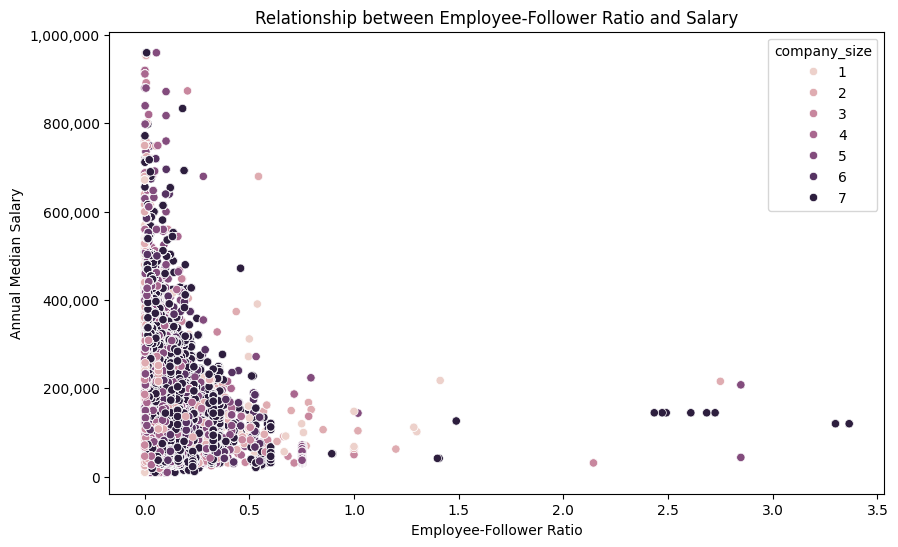

In [173]:
# 1. Relationship between follower_employee_ratio and salary
# Create a scatter plot to show the relationship between follower_employee_ratio and salary with different company sizes
import matplotlib.ticker as mticker

# 1. Relationship between follower_employee_ratio and salary
# Create a scatter plot to show the relationship between follower_employee_ratio and salary with different company sizes
plt.figure(figsize=(10, 6))
print(df['annual_med_salary'])

#filter these extremely high values
df_toplot = df_filtered[df_filtered['annual_med_salary'] < 1000000]

plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=df_toplot, x='employee_follower_ratio', y='annual_med_salary', hue='company_size')


ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
ax.set_title('Relationship between Employee-Follower Ratio and Salary')
ax.set_xlabel('Employee-Follower Ratio')
ax.set_ylabel('Annual Median Salary')

plt.show()

This chart shows the relationship between the employee-follower ratio and the median salary. The different colors and sizes represent different company sizes.
The data shows that when the employee-follower ratio is close to 0, the salary range is larger, with some points exceeding 800,000 dollars in annual salary. Most data points are concentrated within this ratio range, indicating that in companies with a low employee-to-follower ratio, the salary levels show greater variability. As the employee-follower ratio increases, the upper salary limit decreases. Therefore, a higher ratio may correspond to lower salary levels.

<Figure size 1000x600 with 0 Axes>

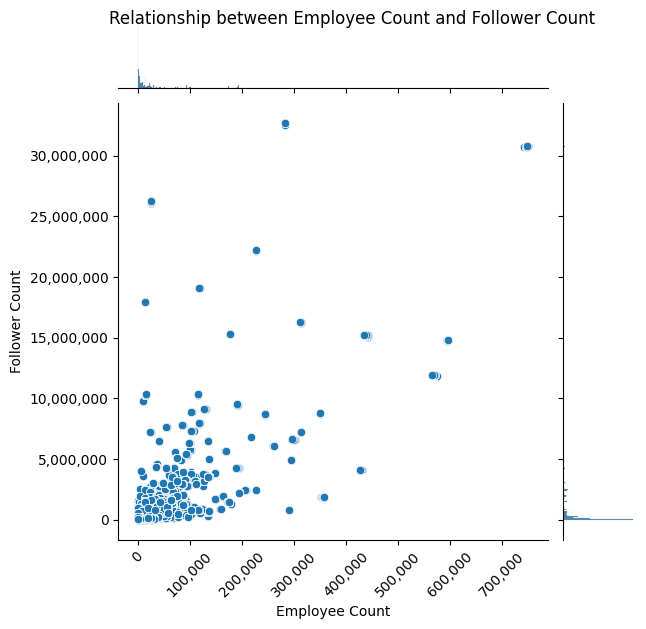

In [174]:
# 2. Check if there are some small companies with high attention: joint plot of employee count and follower count if both are not equal to 0
plt.figure(figsize=(10, 6))
g = sns.jointplot(data=df[(df['employee_count'] > 0) & (df['follower_count'] > 0)], x='employee_count', y='follower_count', kind='scatter')
g.ax_joint.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
g.ax_joint.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
g.ax_joint.set_xlabel('Employee Count')
g.ax_joint.set_ylabel('Follower Count')
g.fig.suptitle('Relationship between Employee Count and Follower Count')
# rotate the x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

There is some positive correlation between the number of employees and the number of followers, but it is not very strong. Some companies have a large number of followers despite having fewer employees, which may be related to the company's brand influence or the nature of the industry.

Text(0, 0.5, 'Frequency')

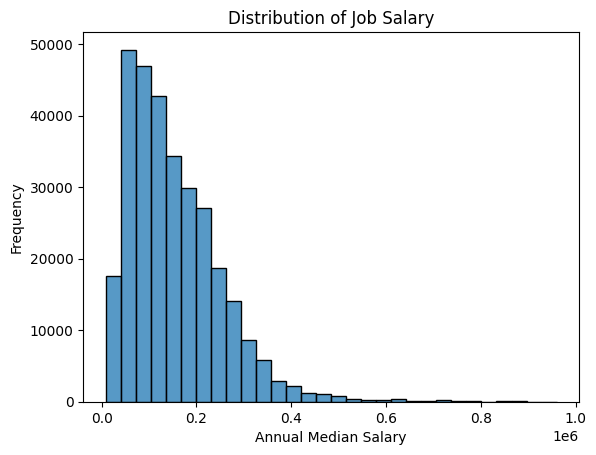

In [175]:
#3. Distribution of Job annual Salary
sns.histplot(data=df_toplot, x='annual_med_salary', bins=30)
plt.title('Distribution of Job Salary')
plt.xlabel('Annual Median Salary')
plt.ylabel('Frequency')

Most of the salaries are concentrated between 0 and 200,000 dollars. It shows a typical right-skewed distribution where higher salaries gradually decrease and extends to large scale. The right tail extends to around 1 million dolllars, but these are only a few data points.

<Axes: xlabel='skill_category', ylabel='annual_med_salary'>

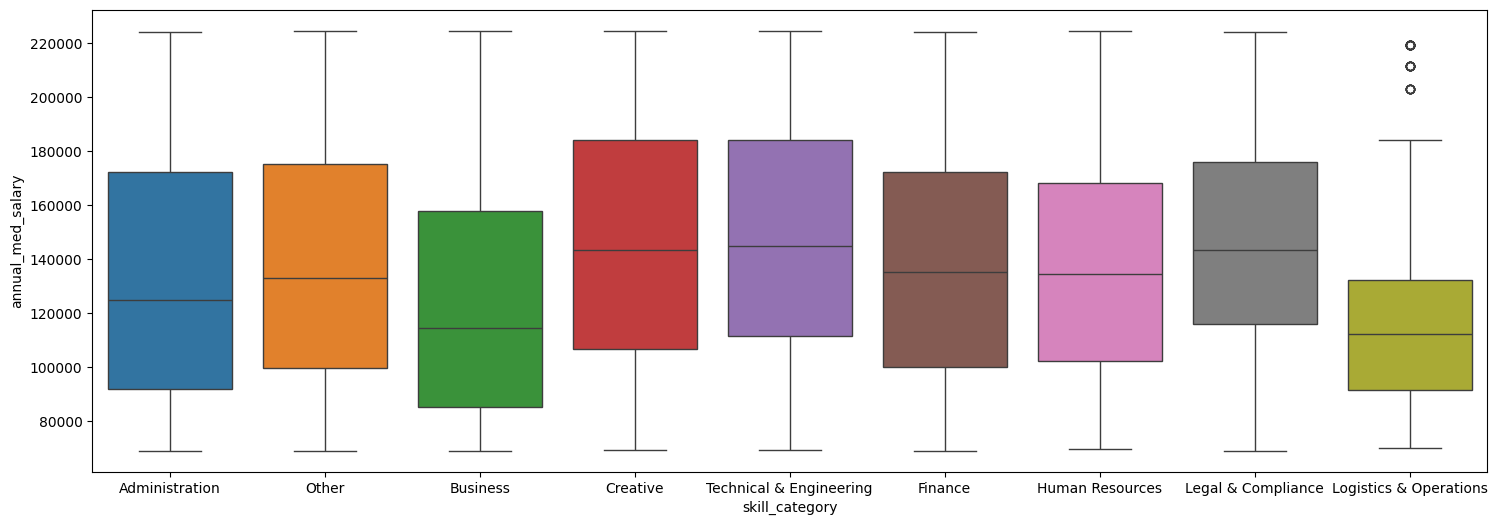

In [176]:
#3. plot the distribution of job salary by skills and industries
plt.figure(figsize=(18, 6))
# set thresholds for the number of rows to display
threshold_low = 0.2
threshold_high = 0.8
# get the top and bottom quantiles that stands for most jobs 
low_quantile = df_toplot['annual_med_salary'].quantile(threshold_low)
high_quantile = df_toplot['annual_med_salary'].quantile(threshold_high)
# filter the data
df_toplot_1 = df_toplot[(df_toplot['annual_med_salary'] > low_quantile) & (df_toplot['annual_med_salary'] < high_quantile)]
# plot the data
sns.boxplot(data=df_toplot_1, x='skill_category', y='annual_med_salary',hue = 'skill_category')


The Technical & Engineering and Legal & Compliance categories have higher median salaries and larger salary ranges. This result could reflect a wide gap between entry-level positions and highly skilled roles in these fields and also a trend that people master these skills tend to be paid more.
The Administration and Logistics & Operations categories have lower median salaries with narrower salary ranges, which suggests more consistent pay within these categories.
The outliers in some skill categories (such as Legal & Compliance) suggest that there are a few highly compensated positions that skew the distribution.

# **Reference**

https://www.kaggle.com/code/muhammadrifqimaruf/top10-recommendation-linkedin-job-posting

https://www.dol.gov/general/topic/benefits-leave/fmla#:~:text=The%20Family%20and%20Medical%20Leave,job%2Dprotected%20leave%20per%20year.